# Question 1


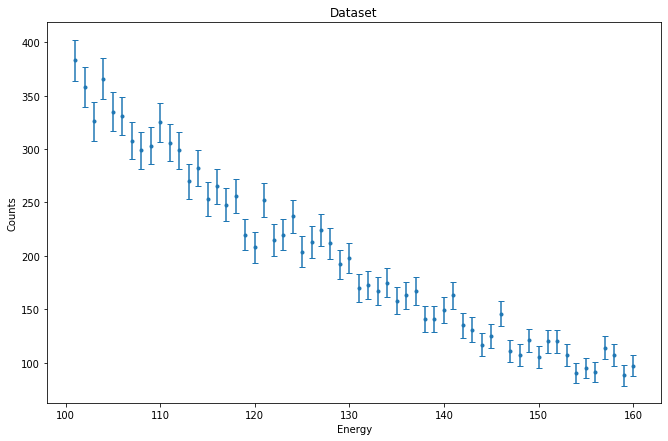

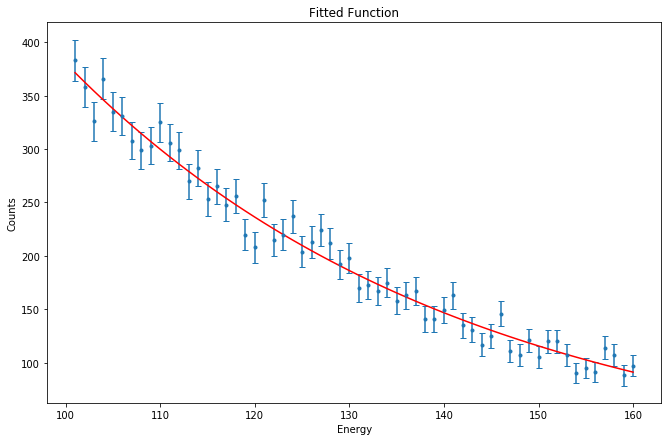

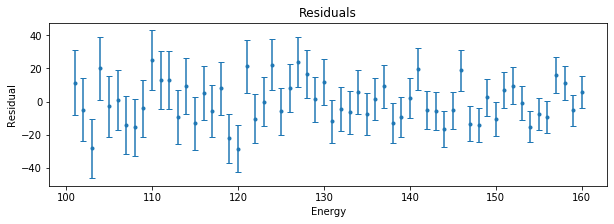

Reduced Chi^2 = 0.9085261189681375
Chi^2 = Power_divergenceResult(statistic=51.78598878118384, pvalue=0.7360494566515468)
P(x > chi^2) = 0.7360494566515468
Significance: (-1.1171024026056593, 1.1171024026056593)
Normalised chi2: 10.177031864073516
Normalised prob: 0.7387907996584477
Significance: (-1.123537695574722, 1.123537695574722)


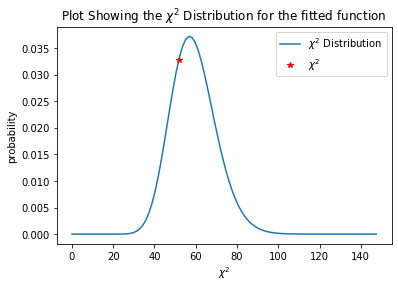

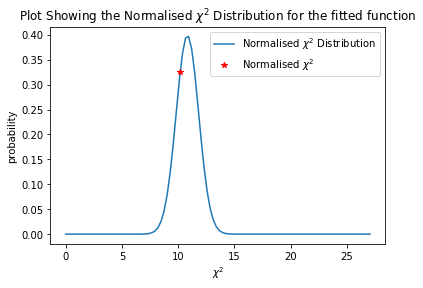

In [15]:
from prettytable import PrettyTable
import scipy.optimize as optimize
%matplotlib inline
from scipy.io import loadmat
from scipy.stats import chisquare, chi2, norm
import matplotlib.pyplot as plt
import math
import numpy as np


## FUNCTIONS
def plotChiDist(chi,dof,):
    # Plot graphs.
    x = np.linspace(0,2.5*dof,100)
        
    # Pdf calcs
    CDF = chi2.pdf(x,dof)           # Curve
    y_chi2 = chi2.pdf(chi,dof)      # Sample Chi^2
    
    # Plot curve and points
    plt.plot(x,CDF, label="$\chi^2$ Distribution")
    plt.plot(chi,y_chi2,'r*', label="$\chi^2$" )
    plt.title("Plot Showing the $\chi^2$ Distribution for the fitted function")
    
    plt.xlabel('$\chi^2$')
    plt.ylabel("probability")
    plt.legend()
    plt.show()
    
def plotNormDist(m,s,chi):
    # Plot graphs.
    x = np.linspace(0,2.5*m,100)
        
    # Pdf calcs
    normDist = norm.pdf(x,m,s)           # Curve
    y_chi2 = norm.pdf(chi,m,s)      # Sample Chi^2
    
    # Plot curve and points
    plt.plot(x,normDist, label="Normalised $\chi^2$ Distribution")
    plt.plot(chi,y_chi2,'r*', label="Normalised $\chi^2$" )
    plt.title("Plot Showing the Normalised $\chi^2$ Distribution for the fitted function")
    
    plt.xlabel('$\chi^2$')
    plt.ylabel("probability")
    plt.legend()
    plt.show()

# Return upper and lower Confidence Interval
def calculateCI(CI,mean,sigma,doubleTail=True):
    if doubleTail: prob = (1-CI)/2
    else: prob = 1-CI
    return norm.isf(1-prob,mean,sigma),norm.isf(prob,mean,sigma)

## LOAD DATASET
e=n=0
W = loadmat('ATLAS_DATA1.mat', mat_dtype=True, squeeze_me=True)
locals().update({k : W[k] for k in ['e', 'n']})

# PLOT DATASET
figure = plt.figure(figsize=(11,7))
n_error = np.sqrt(n)
plt.errorbar(e,n,n_error, fmt=".", capsize=3)
plt.xlabel('Energy')
plt.ylabel("Counts")
plt.title("Dataset")
plt.show()

# FIRST GUESSES
a = 1000
b = -0.01

def fitted_function(e,a,b):
    return a*np.exp(b*e)

params, params_covariance = optimize.curve_fit(fitted_function,e,n,p0=[a,b])
a_bkg = params[0]
b_bkg = params[1]
n_fitted = fitted_function(e,a_bkg,b_bkg)

# PLOT FITTED FUNCTION
figure = plt.figure(figsize=(11,7))
n_error = np.sqrt(n)
plt.errorbar(e,n,n_error, fmt=".", capsize=3)
plt.plot(e,n_fitted, "r")
plt.xlabel('Energy')
plt.ylabel("Counts")
plt.title("Fitted Function")
plt.show()

residual = n-n_fitted

# PLOT RESIDUALS
figure = plt.figure(figsize=(10,3))
plt.errorbar(e,residual,n_error, fmt=".", capsize=3)
plt.xlabel('Energy')
plt.ylabel("Residual")
plt.title("Residuals")
plt.show()

###### ADD THESE TO TABLE!!!

## Chi^2 plot
chi = chisquare(n,n_fitted)
prob = chi2.sf(chi,len(n)-1)
dof = len(n)-1
reduced_chi2 = chi[0]/(dof-2)

print("Reduced Chi^2 = {}".format(reduced_chi2))
print("Chi^2 = {}".format(chi))
print("P(x > chi^2) = {}".format(chi[1]))
print("Significance: {}".format(calculateCI(chi[1],0,1)))

plotChiDist(chi[0],dof)

#Normalised Chi^2
normalisedChi = np.sqrt(2*chi[0])
probNorm = norm.sf(normalisedChi,(2*dof-1)**0.5,1)

print("Normalised chi2: {}".format(normalisedChi))
print("Normalised prob: {}".format(probNorm))
print("Significance: {}".format(calculateCI(probNorm,0,1)))

plotNormDist((2*dof-1)**0.5,1,normalisedChi)

## NUMBER OF EVENTS
n1 = sum(n)

# Question 2

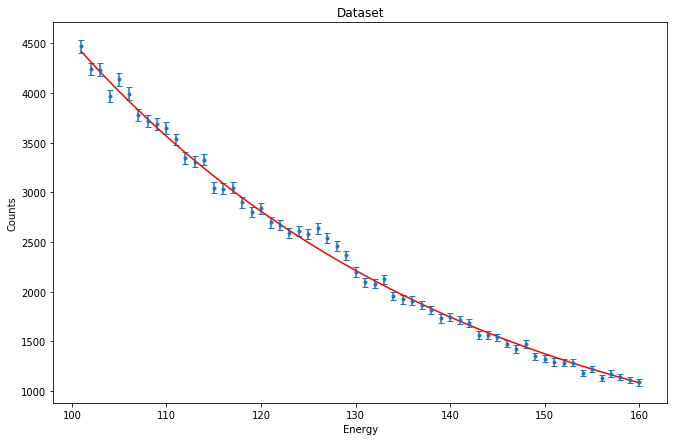

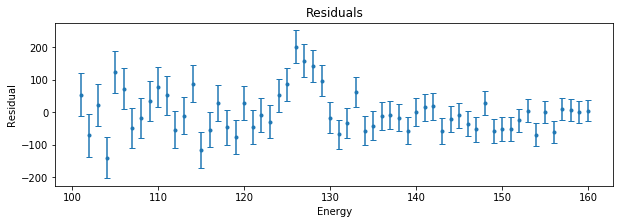

In [14]:
## LOAD DATASET
e=n=0
W = loadmat('ATLAS_DATA2.mat', mat_dtype=True, squeeze_me=True)
locals().update({k : W[k] for k in ['e', 'n']})

## Number of events in Dataset 2
n2 = sum(n)
a = a_bkg*(n2/n1)

# PLOT DATASET
figure = plt.figure(figsize=(11,7))
n_error = np.sqrt(n)
plt.errorbar(e,n,n_error, fmt=".", capsize=3)
n_fitted = fitted_function(e,a,b_bkg)
plt.plot(e,n_fitted, "r")
plt.xlabel('Energy')
plt.ylabel("Counts")
plt.title("Dataset")
plt.show()

residual = n-n_fitted

# PLOT RESIDUALS
figure = plt.figure(figsize=(10,3))
plt.errorbar(e,residual,n_error, fmt=".", capsize=3)
plt.xlabel('Energy')
plt.ylabel("Residual")
plt.title("Residuals")
plt.show()